In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from gymnasium import Env
from gymnasium.spaces import Discrete, Box

In [10]:
class GridWorldEnv(Env):
    def __init__(self):
        # Define the grid size and states
        self.grid_size = 5
        self.state_space = [(i, j) for i in range(self.grid_size) for j in range(self.grid_size)]
        self.action_space = Discrete(4)  # Actions: 0=Up, 1=Right, 2=Down, 3=Left
        self.observation_space = Box(low=0, high=self.grid_size-1, shape=(2,), dtype=int)
        
        # Define rewards
        self.rewards = {  # Example reward positions and values
            (0, 2): -5,
            (2, 3): -6,
            (2, 1): +5,
            (4, 2): +7,
            (4, 4): +10  # Goal state with the maximum reward
        }
        
        # Initial state
        self.state = (0, 0)
        self.goal_state = (4, 4)
    
    def reset(self):
        self.state = (0, 0)
        return np.array(self.state, dtype=int)
    
    def step(self, action):
        row, col = self.state
        
        # Update the position based on the action
        if action == 0 and row > 0:         # Up
            row -= 1
        elif action == 1 and col < self.grid_size - 1:  # Right
            col += 1
        elif action == 2 and row < self.grid_size - 1:  # Down
            row += 1
        elif action == 3 and col > 0:       # Left
            col -= 1
            
        self.state = (row, col)
        
        # Calculate reward
        reward = self.rewards.get(self.state, 0)
        done = self.state == self.goal_state
        
        return np.array(self.state, dtype=int), reward, done, {}
    
    def render(self):
        grid = np.zeros((self.grid_size, self.grid_size))
        for position, reward in self.rewards.items():
            grid[position] = reward
        grid[self.state] = 1  # Mark agent's position
        plt.imshow(grid, cmap='coolwarm', origin='upper')
        plt.colorbar()
        plt.show()

State: [0 0], Action: 3, Reward: 0, Next State: [0 0]


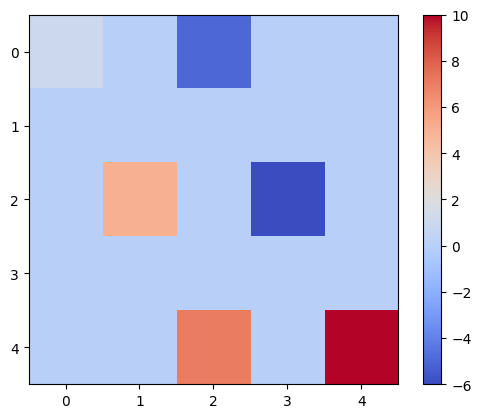

State: [0 0], Action: 0, Reward: 0, Next State: [0 0]


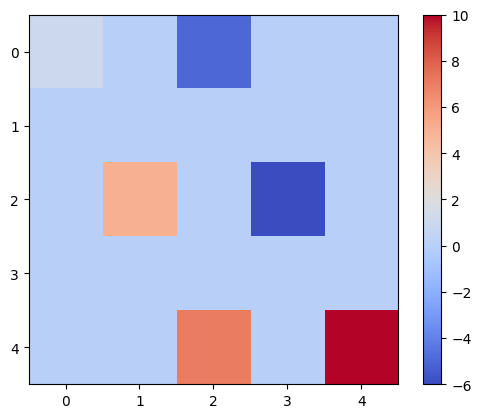

State: [0 0], Action: 3, Reward: 0, Next State: [0 0]


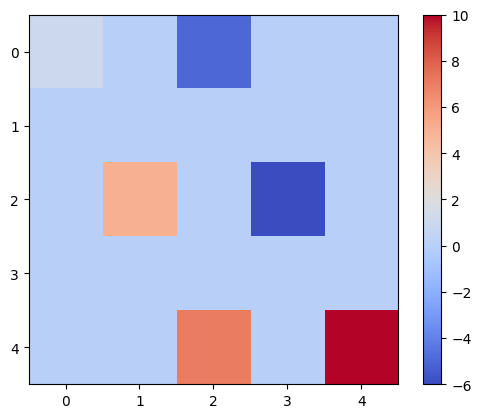

State: [0 0], Action: 2, Reward: 0, Next State: [1 0]


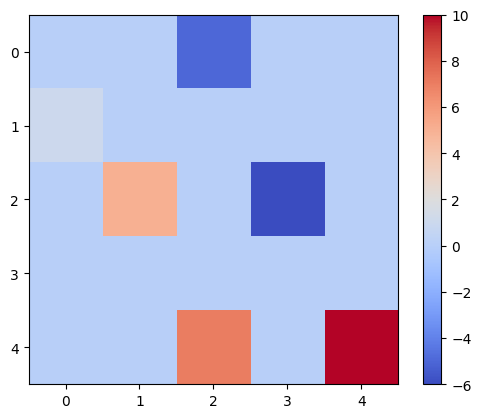

State: [1 0], Action: 0, Reward: 0, Next State: [0 0]


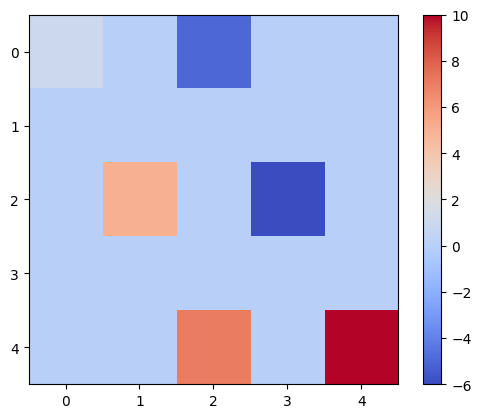

State: [0 0], Action: 0, Reward: 0, Next State: [0 0]


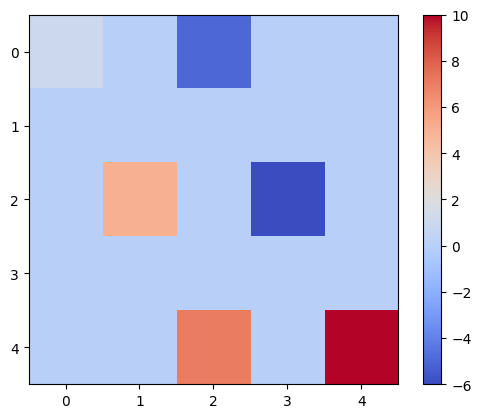

State: [0 0], Action: 2, Reward: 0, Next State: [1 0]


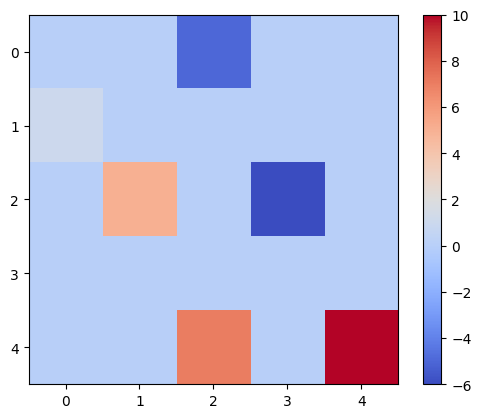

State: [1 0], Action: 3, Reward: 0, Next State: [1 0]


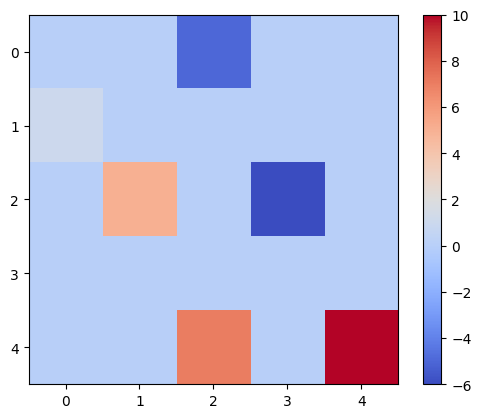

State: [1 0], Action: 3, Reward: 0, Next State: [1 0]


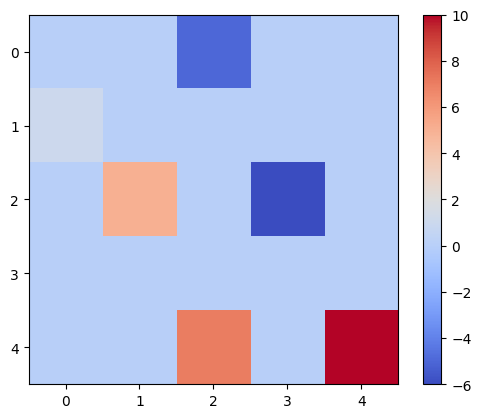

State: [1 0], Action: 0, Reward: 0, Next State: [0 0]


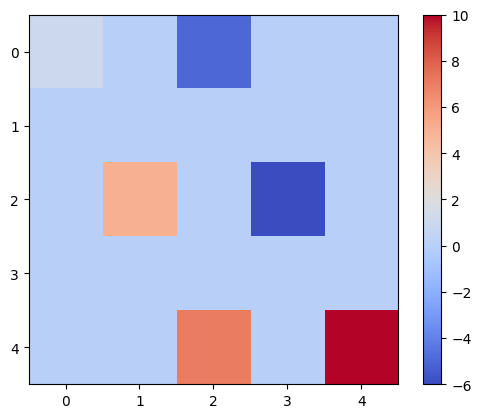

In [11]:
# Run a random agent
env = GridWorldEnv()
state = env.reset()
for _ in range(10):
    action = env.action_space.sample()  # Random action
    next_state, reward, done, _ = env.step(action)
    print(f"State: {state}, Action: {action}, Reward: {reward}, Next State: {next_state}")
    env.render()
    state = next_state
    if done:
        print("Reached the goal!")
        break
